In [27]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Cargar solo los datos de entrenamiento del dataset MNIST
(x_train, y_train), (_, _) = mnist.load_data()
x_train = x_train / 255.0

# Verificar la forma de los datos cargados
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)


Red neuronal inicializada aleatoriamente se fija como un modelo "h".

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Definir una red neuronal simple
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Aplanar las imágenes 28x28 en un vector de 784 elementos
    layers.Dense(128, activation='relu'),  # Capa totalmente conectada con 128 neuronas y ReLU como función de activación
    layers.Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (una para cada dígito) y softmax
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo con los datos de entrenamiento
history = model.fit(x_train, y_train, epochs=5, batch_size=32)

# Mostrar la precisión final en los datos de entrenamiento
train_acc = history.history['accuracy'][-1]
print(f"Precisión final en el conjunto de entrenamiento: {train_acc:.4f}")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8748 - loss: 0.4407
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9652 - loss: 0.1198
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9783 - loss: 0.0752
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9828 - loss: 0.0560
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9870 - loss: 0.0420
Precisión final en el conjunto de entrenamiento: 0.9866


1. Establecemos valores de "n" en 10, 50, 100, 200, 400
2. Para el conjunto de entrenamiento, vamos a tomar una muestra de tamaño "n" del total y veremos cómo predice "h" en esos "n" ejemplos (fracción de error $e_{in}$).

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Definir la red neuronal simple
def create_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Valores de "n" para el muestreo
n_values = [50, 100, 200, 400, 1000, 4000, 20000, 40000]

# Almacenar resultados
results = {}

# Realizar el experimento para cada valor de "n"
for n in n_values:
    # Tomar muestra aleatoria de tamaño "n"
    indices = np.random.choice(len(x_train), n, replace=False)
    x_sample = x_train[indices]
    y_sample = y_train[indices]

    # Crear un nuevo modelo (para mantener parámetros fijos pero inicialización diferente)
    model = create_model()

    # Entrenar el modelo con la muestra
    model.fit(x_sample, y_sample, epochs=5, batch_size=32, verbose=0)

    # Realizar predicciones en la muestra
    predictions = model.predict(x_sample)
    predicted_labels = np.argmax(predictions, axis=1)

    # Contar aciertos y errores
    correct_predictions = np.sum(predicted_labels == y_sample)
    incorrect_predictions = n - correct_predictions

    # Calcular la fracción de error e_in
    e_in = incorrect_predictions / n

    # Almacenar los resultados
    results[n] = {'correct': correct_predictions, 'incorrect': incorrect_predictions, 'e_in': e_in}

# Mostrar los resultados
for n, result in results.items():
    print(f"Muestra de tamaño {n}: Correctos = {result['correct']}, Incorrectos = {result['incorrect']}, e_in = {result['e_in']:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Muestra de tamaño 50: Correctos = 39, Incorrectos = 11, e_in = 0.2200
Muestra de tamaño 100: Correctos = 91, Incorrectos = 9, e_in = 0.0900
Muestra de tamaño 200: Correctos = 183, Incorrectos = 17, e_in = 0.0850
Muestra de tamaño 400: Correctos = 383, Incorrectos = 17, e_in = 0.0425
Muestra de tamaño 1000: Correctos = 959, Incorrectos = 41, e_in = 0.0410
Muestra de tamaño 4000: Correctos = 3884, Incorrectos = 116, e_in = 0.0290
Muestra de tamaño 20000: Correctos = 19667, Incorrectos = 333, e_in = 0.0167
Muestra de tamaño 40000: Correctos = 39343, Incorrectos = 657, e_in = 0.0164


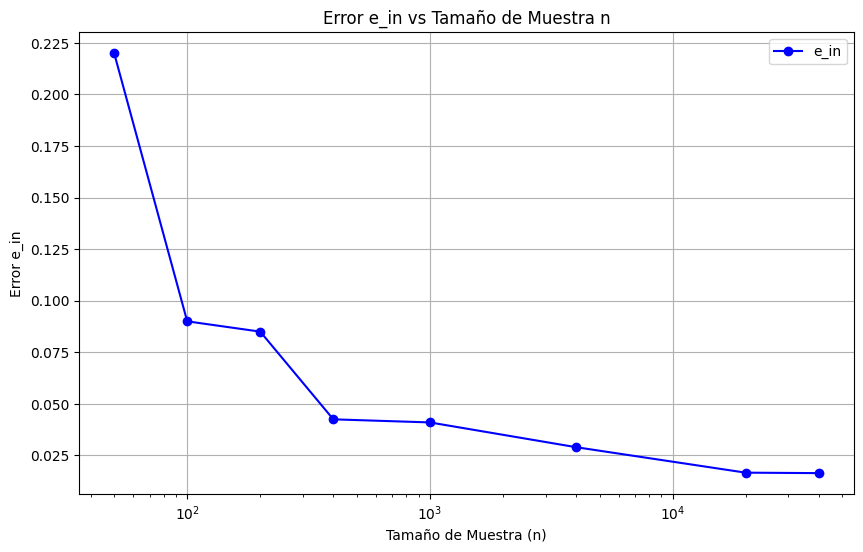

In [30]:
import matplotlib.pyplot as plt

# Extraer los valores de n y los errores e_in de los resultados
n_values = list(results.keys())
e_in_values = [results[n]['e_in'] for n in n_values]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(n_values, e_in_values, marker='o', linestyle='-', color='b', label='e_in')

# Añadir títulos y etiquetas
plt.title('Error e_in vs Tamaño de Muestra n')
plt.xlabel('Tamaño de Muestra (n)')
plt.ylabel('Error e_in')
plt.xscale('log')  # Escala logarítmica en el eje x para una mejor visualización
plt.grid(True)
plt.legend()

# Mostrar la gráfica
plt.show()

Posteriormente, revisar la fracción de error ($e_{out}$) en el total de datos de prueba.

In [31]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Cargar y preprocesar los datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Evaluar el modelo en el conjunto de prueba
def evaluate_model(model, x_test, y_test):
    # Evaluar el modelo
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

    # Calcular la fracción de error
    e_test = 1 - accuracy

    return e_test

# Evaluar el modelo
e_test = evaluate_model(model, x_test, y_test)

# Imprimir el error
print(f"Error en el conjunto de prueba: e_test = {e_test:.4f}")

Error en el conjunto de prueba: e_test = 0.0306


Graficar histograma con ambos errores para cada tamaño de muestra.

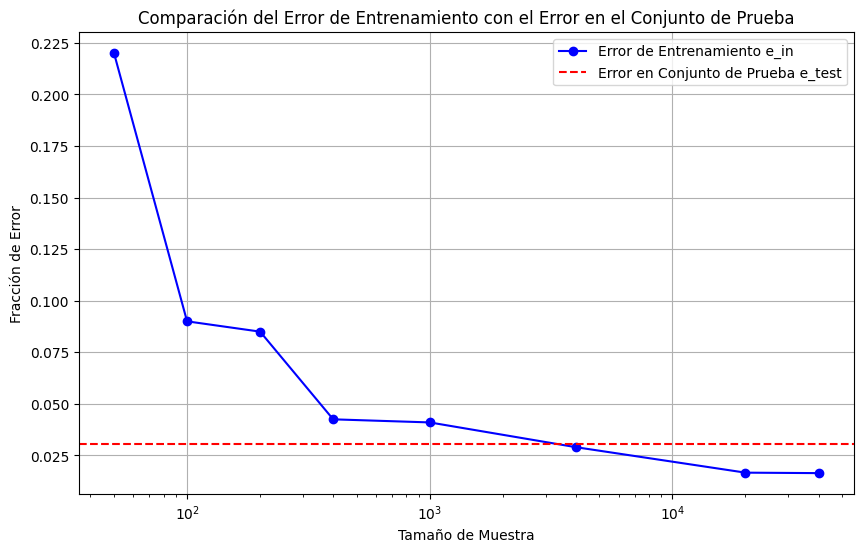

In [32]:
import matplotlib.pyplot as plt

# Asumir que `e_test` es el error en el conjunto de prueba, calculado anteriormente
# Por ejemplo, puedes tener e_test ya definido de la siguiente manera:
# e_test = evaluate_model(model, x_test, y_test)

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar el error de entrenamiento para diferentes tamaños de muestra
plt.plot(n_values, e_in_values, marker='o', linestyle='-', color='b', label='Error de Entrenamiento e_in')

# Agregar una línea horizontal para el error de prueba
plt.axhline(y=e_test, color='r', linestyle='--', label='Error en Conjunto de Prueba e_test')

# Añadir etiquetas y leyenda
plt.xlabel('Tamaño de Muestra')
plt.ylabel('Fracción de Error')
plt.title('Comparación del Error de Entrenamiento con el Error en el Conjunto de Prueba')
plt.legend()
plt.xscale('log')  # Usar escala logarítmica si los tamaños de muestra varían mucho
plt.grid(True)

# Mostrar la gráfica
plt.show()